# Name - Hitanshi Gupta<br/>
# Reg No - 23122015<br/>
# Class - 3MscDs-A<br/>
# CAC-2 : Implementing K-Means on a Dataset

**About the Dataset**<br/>
The 'Facebook Live Sellers in Thailand'. The data contains 7050 observations and twelve attributes. The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection.

**K-Means Clustering**</br>
K-means clustering aims to partition a dataset into K distinct, non-overlapping clusters. Each observation belongs to the cluster with the nearest mean (also known as the cluster center or centroid), which serves as a prototype for that cluster.</br>
It’s an iterative algorithm that divides an unlabeled dataset into K different clusters, ensuring that each data point belongs to only one group with similar properties.<br/>
K-means is particularly useful for discovering natural groupings within data without requiring any prior training or labeled examples, i.e unsupervised machine learning algorithm.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
df = pd.read_csv("Dataset/Live.csv")

**Exploratory Data Analysis**

In [4]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.shape #dimensions of the dataset

(7050, 16)

7050 rows and 16 columns/features.

In [6]:
df.columns #columns of the dataset

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [7]:
df.duplicated().sum()

51

In [8]:
df.drop_duplicates(subset='status_id',keep='last',inplace=True)

In [9]:
df.shape

(6997, 16)

After removing the duplicates, the number of rows have now changed.

In [10]:
df.isna().sum() #checking for the null values

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             6997
Column2             6997
Column3             6997
Column4             6997
dtype: int64

There are 4 redundant columns in the dataset. Dropping them all.

In [11]:
df.drop(columns=['Column1','Column2','Column3','Column4'],inplace=True)

In [12]:
df.shape

(6997, 12)

Now, we see that the total columns reduced to 12 after deleting the 4 redundant columns.

In [13]:
df.info() #summary of the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         6997 non-null   object
 1   status_type       6997 non-null   object
 2   status_published  6997 non-null   object
 3   num_reactions     6997 non-null   int64 
 4   num_comments      6997 non-null   int64 
 5   num_shares        6997 non-null   int64 
 6   num_likes         6997 non-null   int64 
 7   num_loves         6997 non-null   int64 
 8   num_wows          6997 non-null   int64 
 9   num_hahas         6997 non-null   int64 
 10  num_sads          6997 non-null   int64 
 11  num_angrys        6997 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 710.6+ KB


There are 3 character variables and remaining 9 numerical variables.

In [14]:
df.describe() #statistical summary

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000
mean,224.951979,225.613977,40.269973,209.899814,12.755181,1.253251,0.698156,0.232671,0.110190
std,452.930082,892.863091,132.064065,439.595761,40.112024,8.726772,3.971462,1.481312,0.688678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


**Exploring the categorical values**

In [15]:
df['status_id']

0        246675545449582_1649696485147474
1        246675545449582_1649426988507757
2        246675545449582_1648730588577397
3        246675545449582_1648576705259452
4        246675545449582_1645700502213739
                      ...                
7045    1050855161656896_1061863470556065
7046    1050855161656896_1061334757275603
7047    1050855161656896_1060126464063099
7048    1050855161656896_1058663487542730
7049    1050855161656896_1050858841656528
Name: status_id, Length: 6997, dtype: object

In [16]:
df['status_id'].nunique()

6997

In [17]:
df['status_published']

0        4/22/2018 6:00
1       4/21/2018 22:45
2        4/21/2018 6:17
3        4/21/2018 2:29
4        4/18/2018 3:22
             ...       
7045     9/24/2016 2:58
7046    9/23/2016 11:19
7047    9/21/2016 23:03
7048     9/20/2016 0:43
7049    9/10/2016 10:30
Name: status_published, Length: 6997, dtype: object

In [18]:
df['status_published'].nunique()

6911

In [19]:
df['status_type']

0       video
1       photo
2       video
3       photo
4       photo
        ...  
7045    photo
7046    photo
7047    photo
7048    photo
7049    photo
Name: status_type, Length: 6997, dtype: object

In [20]:
df['status_type'].nunique()

4

In [21]:
df['status_type'].value_counts()

status_type
photo     4242
video     2333
status     359
link        63
Name: count, dtype: int64

Clearly, 'status_id' and 'status_published' seems to be unique for each record, therefore, dropping them.

In [22]:
df.drop(columns=['status_id', 'status_published'], inplace=True)

In [23]:
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

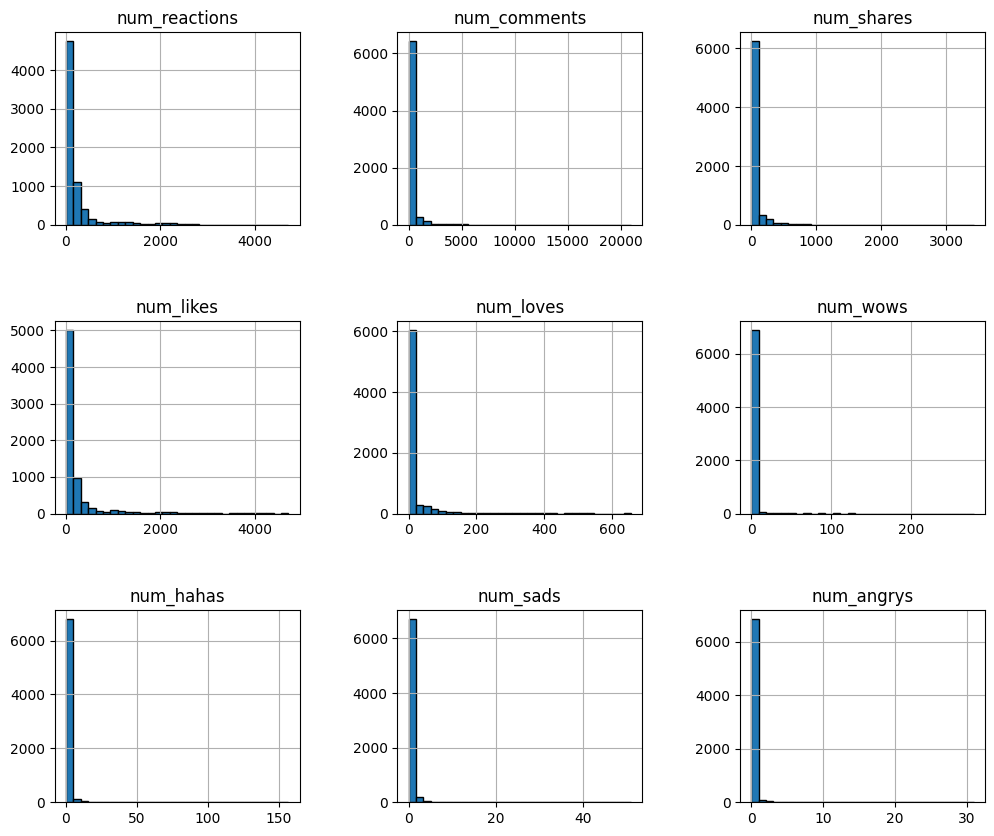

In [24]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.4)

**Feature Engineering**

In [25]:
X = df
y =df['status_type']

In [26]:
df.drop('status_type', axis =1, inplace=True)

**Encoding Categorical Variables To Numericals**

In [27]:
from sklearn.preprocessing import LabelEncoder
labedencoder = LabelEncoder()
y = labedencoder.fit_transform(y)

In [28]:
print(X)

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529           512         262        432         92         3   
1               150             0           0        150          0         0   
2               227           236          57        204         21         1   
3               111             0           0        111          0         0   
4               213             0           0        204          9         0   
...             ...           ...         ...        ...        ...       ...   
7045             89             0           0         89          0         0   
7046             16             0           0         14          1         0   
7047              2             0           0          1          1         0   
7048            351            12          22        349          2         0   
7049             17             0           0         17          0         0   

      num_hahas  num_sads  

In [29]:
print(y)

[3 1 3 ... 1 1 1]


**Feature Scaling**

In [30]:
cols = X.columns
cols

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [31]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X = minmaxscaler.fit_transform(X)

In [32]:
print(X)

[[0.11231423 0.02439257 0.07651869 ... 0.00636943 0.01960784 0.        ]
 [0.03184713 0.         0.         ... 0.         0.         0.        ]
 [0.04819533 0.01124345 0.0166472  ... 0.00636943 0.         0.        ]
 ...
 [0.00042463 0.         0.         ... 0.         0.         0.        ]
 [0.07452229 0.0005717  0.00642523 ... 0.         0.         0.        ]
 [0.00360934 0.         0.         ... 0.         0.         0.        ]]


In [33]:
X = pd.DataFrame(X, columns=[cols])

In [34]:
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


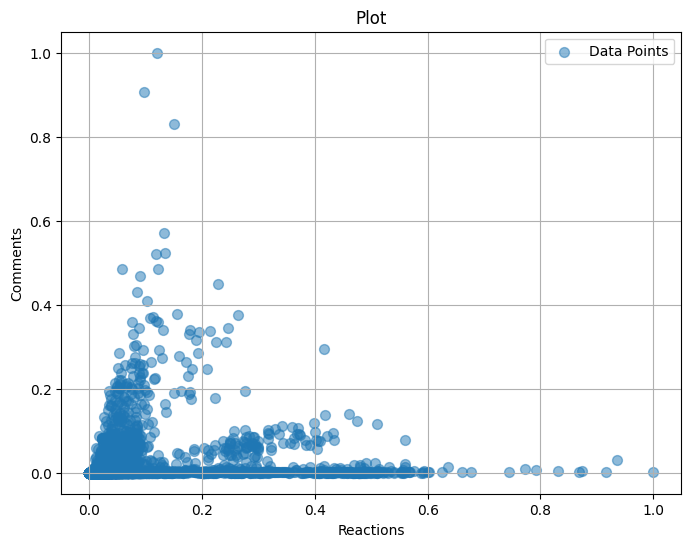

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=50, alpha=0.5, label='Data Points')

plt.title('Plot')
plt.xlabel('Reactions')
plt.ylabel('Comments')
plt.legend()
plt.grid(True)
plt.show()

**Implementing K Means Clustering**

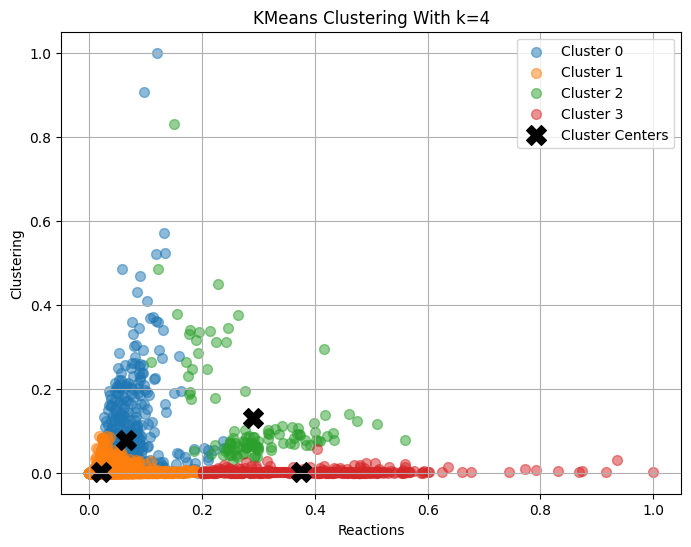

In [36]:
from sklearn.cluster import KMeans
from collections import Counter

# Initialize KMeans with the number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Count occurrences of each label
label_counts = Counter(labels)

# Define a dictionary to map cluster labels to numbers
cluster_mapping = {label: i for i, label in enumerate(label_counts.keys())}

# Plot data points
plt.figure(figsize=(8, 6))
for label in label_counts.keys():
    cluster_data = X[labels == label]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_mapping[label]}', s=50, alpha=0.5)
    
# Plot cluster centers
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, marker='X', label='Cluster Centers')

plt.title('KMeans Clustering With k=4')
plt.xlabel('Reactions')
plt.ylabel('Clustering')
plt.legend()
plt.grid(True)
plt.show()


**Calculating Silhouette Score**
The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where:

A score close to +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.<br/>
A score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.<br/>
A score close to -1 indicates that the object may have been assigned to the wrong cluster.<br/>

In [37]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6843944921503377


In [38]:
print("Inertia:", kmeans.inertia_)

Inertia: 60.00292126962157


**Elbow Method**<br/>
The elbow method involves plotting the sum of squared distances (variance) from each data point to its assigned centroid for different values of K. The “elbow” point on the plot indicates the optimal K, where adding more clusters doesn’t significantly reduce variance.

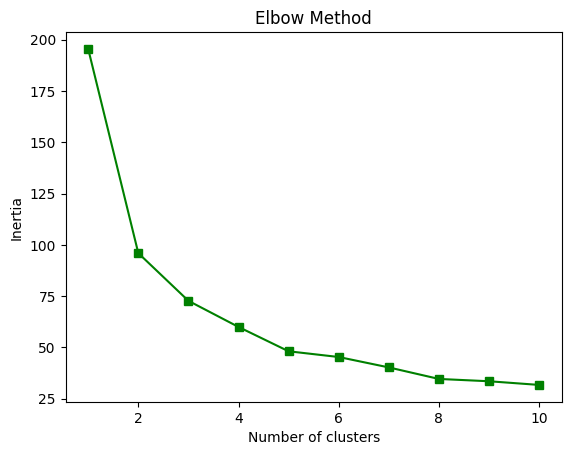

In [39]:
inertia = {}
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    inertia[i] = kmeans.inertia_
     
plt.plot(inertia.keys(), inertia.values(),'gs-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

From the graph above, we can see that there is a turning like an elbow at k=2. So, we can say that the optimal number of clusters for the given datasets is 2.

Changing the no. of clusters to 2.

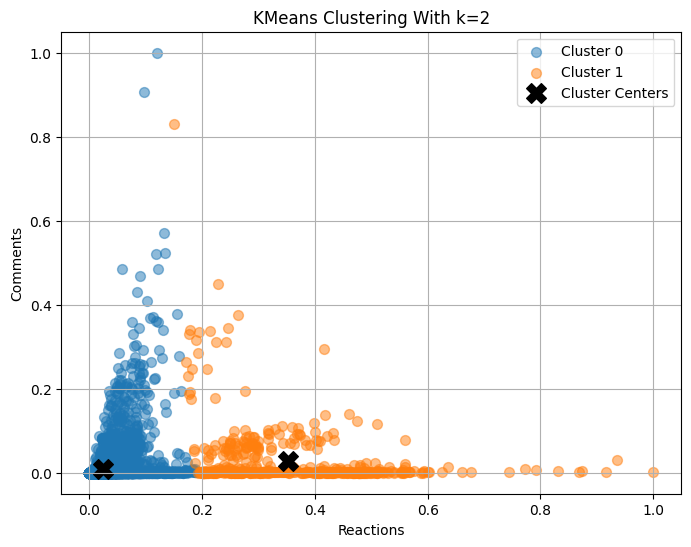

In [40]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
label_counts = Counter(labels)
cluster_mapping = {label: i for i, label in enumerate(label_counts.keys())}

plt.figure(figsize=(8, 6))
for label in label_counts.keys():
    cluster_data = X[labels == label]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_mapping[label]}', s=50, alpha=0.5)

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, marker='X', label='Cluster Centers')

plt.title('KMeans Clustering With k=2')
plt.xlabel('Reactions')
plt.ylabel('Comments')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8145712040024683


In [42]:
print("Inertia:", kmeans.inertia_)

Inertia: 95.97349395646262


**With different Features**

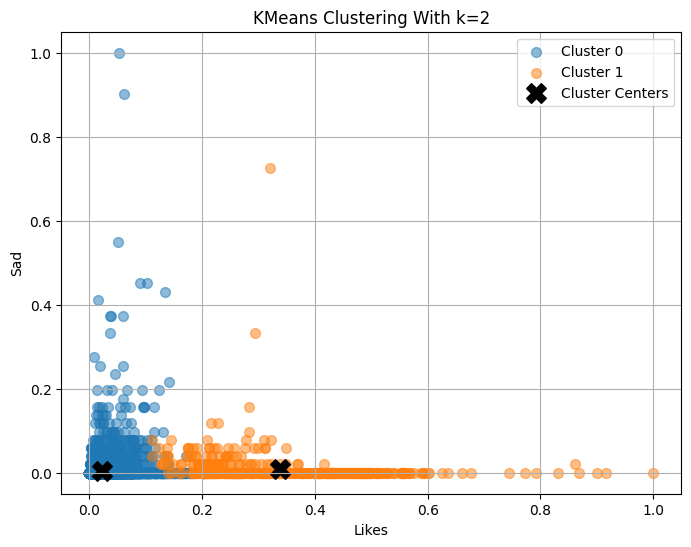

In [43]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
label_counts = Counter(labels)
cluster_mapping = {label: i for i, label in enumerate(label_counts.keys())}

plt.figure(figsize=(8, 6))
for label in label_counts.keys():
    cluster_data = X[labels == label]
    plt.scatter(cluster_data.iloc[:, 3], cluster_data.iloc[:, 7], label=f'Cluster {cluster_mapping[label]}', s=50, alpha=0.5)

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 3], cluster_centers[:, 7], c='black', s=200, marker='X', label='Cluster Centers')

plt.title('KMeans Clustering With k=2')
plt.xlabel('Likes')
plt.ylabel('Sad')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8145712040024683


In [45]:
print("Inertia:", kmeans.inertia_)

Inertia: 95.97349395646263


**Implementing K-Means after PCA**

Principal Component Analysis is a technique that transforms high-dimensions data into lower-dimension while retaining as much information as possible.
Minimize the dataset from 9 features to 2 features using PCA.

In [46]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
reduced_X.head()

,PCA1,PCA2
0,0.105164,0.106953
1,-0.025524,-0.021499
2,0.001872,0.010861
3,-0.036944,-0.018938
4,-0.006063,-0.015334


In [47]:
centers=pca.transform(kmeans.cluster_centers_) #reducing the cluster centers using PCA.
centers

array([[-0.03292863,  0.00074134],
       [ 0.43159077, -0.00971661]])

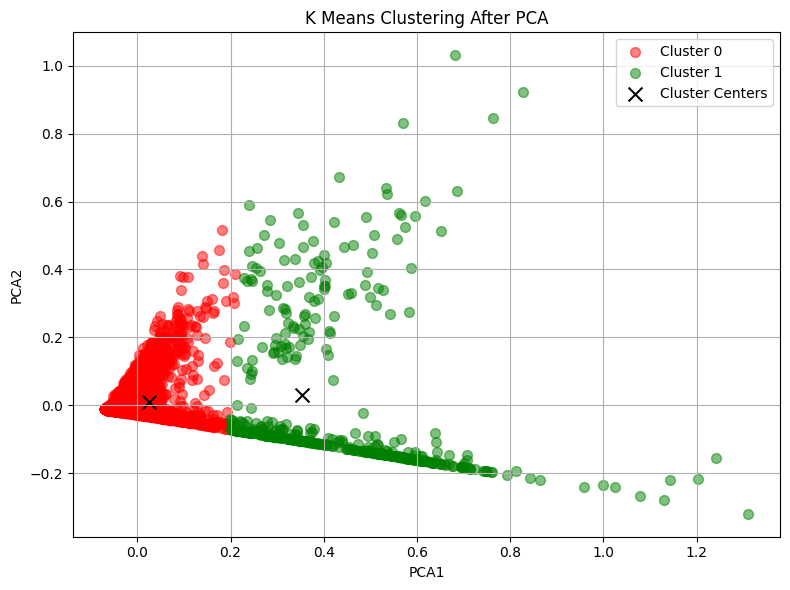

In [48]:
import numpy as np

# Initialize a list to store legend labels
legend_labels = []

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Plot data points for each cluster with specified colors
plt.figure(figsize=(8, 6))
for label, color in zip(label_counts.keys(), colors):
    cluster_data = reduced_X[labels == label]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_mapping[label]}', s=50, alpha=0.5, color=color)
    legend_labels.append(f'Cluster {cluster_mapping[label]}')  # Append legend label for each cluster

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=100, marker='x', label='Cluster Centers')

# Specify legend labels
plt.legend(legend_labels + ['Cluster Centers'])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.title('K Means Clustering After PCA')
plt.tight_layout()
plt.show()


In [49]:
silhouette_avg = silhouette_score(reduced_X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8316002017174879


**Observations**

1. The Elbow Method gives the optimal no. of clusters required for the given dataset.<br/>
2. Silhouette Score determines the quality of clustering results.<br/>
3. After PCA, the silhouette score becomes 0.83 which is more closer to 1 as compared to 0.81(without PCA),hence   clusters formed after PCA are a bit better though no significant difference.<br/>
4.Inertia should be as low as possible.